Uno de los modelos fundamentales para la predicción de series temporales es el modelo de media móvil, denotado como MA(q). El modelo MA es útil para capturar la correlación a corto plazo en una serie temporal y sirve como base para modelos más complejos como los modelos ARMA, ARIMA, SARIMA y SARIMAX. Comprender profundamente el MA(q) es un paso clave antes de utilizar modelos más complejos para pronosticar series temporales intrincadas.

Un modelo de media móvil se denota como MA(q) donde q es el orden. El modelo expresa el valor presente como una combinación lineal de la media de la serie (mu), el error actual (epsilon) y los errores pasados (epsilon). La magnitud del impacto de los errores pasados en el valor presente se cuantifica utilizando un coeficiente denotado como theta.

El orden q del modelo de media móvil determina la cantidad de errores pasados que afectan el valor presente.

Por lo tanto, podemos ver cómo el orden q del proceso MA(q) afecta la cantidad de errores pasados que deben incluirse en el modelo. Cuanto mayor sea q, más errores pasados afectarán al valor presente. Por lo tanto, es importante determinar el orden del proceso de media móvil para ajustar el modelo adecuado, lo que significa que si tenemos un proceso de media móvil de segundo orden, se utilizará un modelo de media móvil de segundo orden para la predicción.

*One of the fundamental models for time series prediction is the moving average model, denoted as MA(q). The MA model is useful for capturing short-term correlations in a time series and serves as the foundation for more complex models like ARMA, ARIMA, SARIMA, and SARIMAX. Having a deep understanding of MA(q) is a crucial step before using more intricate models to forecast complex time series data.*

*A moving average model is denoted as MA(q) where q is the order. The model expresses the present value as a linear combination of the mean of the series (mu), the present error term (epsilon), and past error terms (epsilon). The magnitude of the impact of past errors on the present value is quantified using a coefficient denoted with theta.*

*The order q of the moving average model determines the number of past error terms that affect the present value. Hence, we can see how the order q of the MA(q) process affects the number of past error terms that must be included in the model. The larger q is, the more past error terms affect the present value. Therefore, it is important to determine the order of the moving average process in order to fit the appropriate model, meaning that if we have a second-order moving average process, then a second-order moving average model will be used for forecasting.*

## Carga de datos y librerias/ *Loading data and libraries*

In [1]:
# Import libraries
import random
import os
import numpy as np
import pandas as pd
import requests

# Date
import datetime as dt
from datetime import date, timedelta, datetime
import time

# EDA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Time Series - EDA and Modelling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from itertools import product

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


# Modeling and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from prophet import Prophet
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('df_BTC_withTransformations.csv',
            index_col = "date",
            parse_dates = True).asfreq("D")

In [3]:
df.tail(5)

,original_series,diff,sqrt,inverse,log,squared,cubic,boxcox,yeo-johnson
date,,,,,,,,,
2023-09-05,25722.4,51.9,160.382044,0.000039,10.155117,6.616419e+08,29.519149,1.189321,1.191613
2023-09-06,25709.9,-12.5,160.343070,0.000039,10.154631,6.609990e+08,29.514366,1.189076,1.191373
2023-09-07,26146.7,436.8,161.699412,0.000038,10.171478,6.836499e+08,29.680574,1.197583,1.199672
2023-09-08,25890.6,-256.1,160.905562,0.000039,10.161635,6.703232e+08,29.583351,1.192610,1.194821
2023-09-09,25883.5,-7.1,160.883498,0.000039,10.161361,6.699556e+08,29.580647,1.192472,1.194686


# Selección de features/ feature selection

Para crear un modelo eficiente de medias móviles se recomienda que la serie sea estacionaria. Luego, sobre esa serie estacionaria, representamos la función de autocorrelación (ACF) y buscamos coeficientes de autocorrelación significativos.
En el caso de un paseo aleatorio, no veremos coeficientes significativos después del retardo 0. Por otro lado, si vemos coeficientes significativos, debemos verificar si se vuelven abruptamente no significativos después de algún retardo q. Si ese es el caso, entonces sabemos que tenemos un proceso de media móvil de orden q. De lo contrario, debemos seguir un conjunto diferente de pasos para descubrir el proceso subyacente de nuestra serie temporal.

Como este es un proyecto de experimentación, usaremos: columna "log" y "diff", dos features que en el capitulo 1 -según la preueba de Dickey Fuller- constatamos como estacionarias; y las columnas "cubic" y "yeo-jhonson", dos features con tendencia.

Dividiremos nuestros datos en train y test en la fecha del 1 de enero de 2023, es decir, haremos la predicción sobre el año 2023 (hasta el mes de septiembre para ser exactos)

*To build an efficient moving average model, it is recommended that the series be stationary. Then, on that stationary series, we plot the autocorrelation function (ACF) and look for significant autocorrelation coefficients.*

*In the case of a random walk, we will not see significant coefficients after lag 0. On the other hand, if we see significant coefficients, we must check if they become abruptly non-significant after some lag q. If that is the case, then we know that we have a moving average process of order q. Otherwise, we must follow a different set of steps to discover the underlying process of our time series.*

*Since this is an experimental project, we will use the "log" and "diff" columns, two features that we confirmed as stationary in Chapter 1 according to the Dickey Fuller test, and the "cubic" and "yeo-johnson" columns, two features with trends.*

*We will split our data into train and test sets on January 1, 2023, which means we will make predictions for the year 2023 (up to the month of September, to be precise).*

## Modelo de medias moviles sobre la serie diferenciada/ *Moving Average Model on the Differentiated Series*

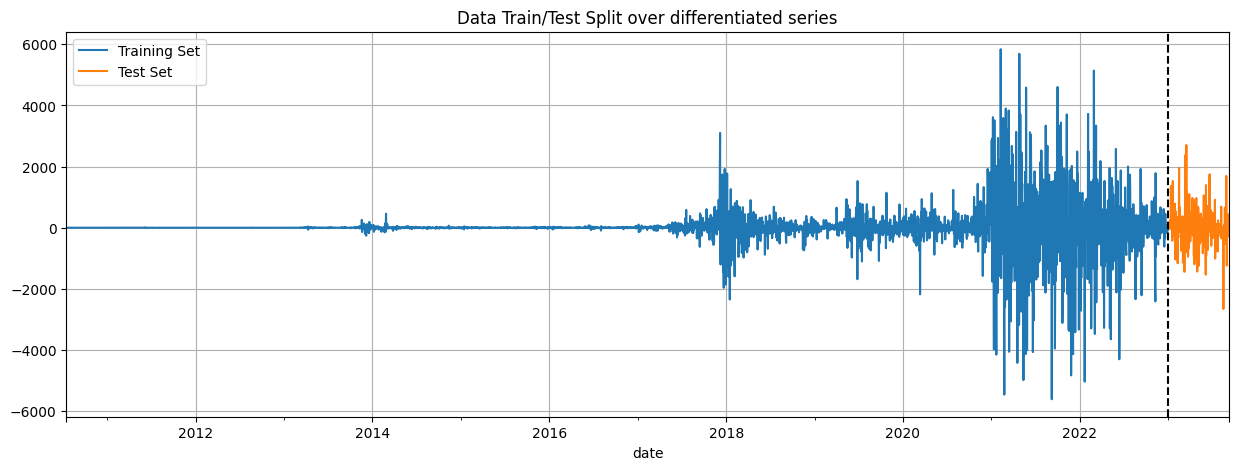

In [4]:
#training and test split and plot

dfDiff = df[['diff']]
trainDiff = dfDiff.loc[dfDiff.index < '2023-01-01']
testDiff = dfDiff.loc[dfDiff.index >= '2023-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
trainDiff.plot(ax=ax, label='Training Set', title='Data Train/Test Split over differentiated series')
testDiff.plot(ax=ax, label='Test Set')
ax.axvline('2023-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
ax.grid()
plt.show()

Crearemos tres medias móviles que son muy usadas en el análisis técnico: la de 50, la de 100 y una exponencial de 100; además crearemos una cuarta media móvil basandonos en su ACF.

*We will create three moving averages commonly used in technical analysis: the 50-period moving average, the 100-period moving average, and a 100-period exponential moving average. Additionally, we will create a fourth moving average based on its ACF.*

In [5]:
testDiff['MA50'] = testDiff.rolling(window=50).mean()
testDiff['MA100'] = testDiff['diff'].rolling(window=100).mean()
testDiff['EMA100'] = testDiff['diff'].ewm(span=100, adjust=False, min_periods=0).mean()


Calculamos el error cuadrático medio:

*Calculating the Mean Squared Error (MSE):*

In [6]:
testDiff = testDiff.dropna()
MSE_50 = mean_squared_error(testDiff['diff'], testDiff['MA50'])
MSE_100 = mean_squared_error(testDiff['diff'], testDiff['MA100'])
MSE_EMA = mean_squared_error(testDiff['diff'], testDiff['EMA100'])
print(f'El error cuadrático medio de la MA de 50 es: {MSE_50}')
print(f'El error cuadrático medio de la MA de 100 es: {MSE_100}')
print(f'El error cuadrático medio de la EMA de 100 es: {MSE_EMA}')

El error cuadrático medio de la MA de 50 es: 312687.42209163395
El error cuadrático medio de la MA de 100 es: 314841.3186400457
El error cuadrático medio de la EMA de 100 es: 310961.2791891168


In [7]:
diff_row = {'Series': 'Differentiated', 'MA50': [MSE_50], 'MA100': [MSE_100], 'EMA100': [MSE_EMA]}
dfMSE = pd.DataFrame(data=diff_row)

In [8]:
dfMSE

,Series,MA50,MA100,EMA100
0,Differentiated,312687.422092,314841.31864,310961.279189


Veamos la cuarta serie mirando el gráfico de autocorrelación (este procedimiento lo haremos sólo esta vez ya que estos gráficos fueron cubiertos en el capítulo anterior):

*Let's look at the fourth series by examining the autocorrelation plot (we will do this procedure only once since these plots were covered in the previous chapter):*

In [9]:
dfDiffMonthly = dfDiff[['diff']].resample('M').mean()
pd.DataFrame(data=dfDiffMonthly)
dfDiffMonthly.head(4)

,diff
date,
2010-07-31,0.003645
2010-08-31,-0.000253
2010-09-30,0.000063
2010-10-31,0.004213


In [10]:
def ACF(df, column):
  # autocorrelation function plot
  sm.graphics.tsa.plot_acf(df, lags=40, alpha=0.05)
  plt.ylabel("Autocorrelation Coefficient")
  plt.title(f"Autocorrelation of column: '{column}'",fontsize = 15)
  plt.xlabel("Lag")
  plt.tight_layout()
  plt.show()

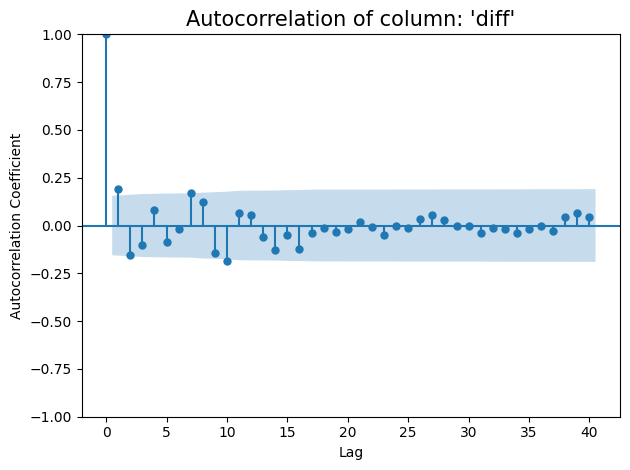

In [11]:
ACF(dfDiffMonthly['diff'],'diff')


Dado que tenemos coeficientes de autocorrelación significativos hasta el retardo 2, esto significaría que tenemos un proceso de media móvil estacionario de orden 2. Pero recordemos que los lags de esta gráfica corresponden a meses, por lo tanto, deberíamos pensar en una MA de orden 60 (sería muy similar a la de 50).

*Since we have significant autocorrelation coefficients up until lag 2, this would imply that we have a stationary moving average process of order 2. However, let's remember that the lags in this plot correspond to months, so we should consider an MA of order 60 (which would be very similar to the one of 50).*

In [12]:
testDiff['MA60'] = testDiff['diff'].rolling(window=60).mean()

In [13]:
testDiff = testDiff.dropna()
MSE_60 = mean_squared_error(testDiff['diff'], testDiff['MA60'])

print(f'El error cuadrático medio de la MA de 60 es: {MSE_60}')


El error cuadrático medio de la MA de 60 es: 271248.8428336288


In [14]:
dfMSE['ACF_MA'] = [MSE_60]
dfMSE

,Series,MA50,MA100,EMA100,ACF_MA
0,Differentiated,312687.422092,314841.31864,310961.279189,271248.842834


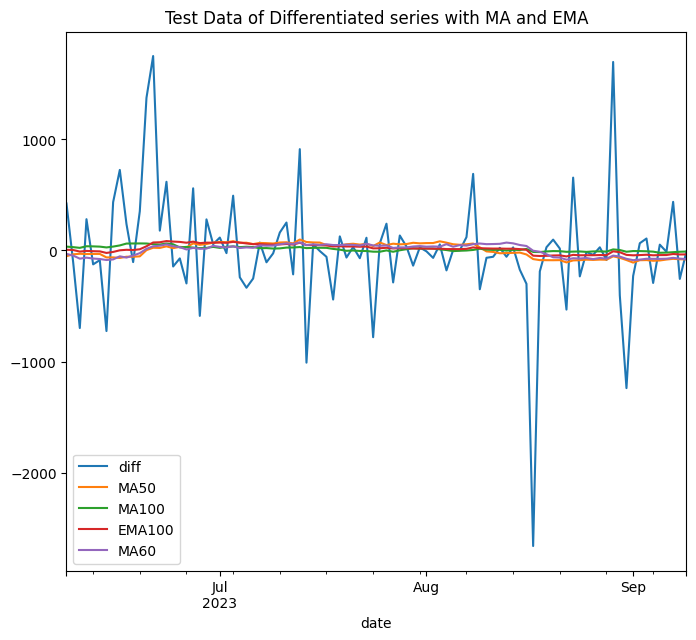

In [15]:
testDiff.plot(figsize=(8,7))
plt.title('Test Data of Differentiated series with MA and EMA')
plt.show()

Podemos apreciar que aunque con poca diferencia, la MA60 obtuvo un error menor.

## Serie logarítmica/ Logarítmic Series

Realizaremos los mismos procedimientos sobre el resto de las series mencionadas:



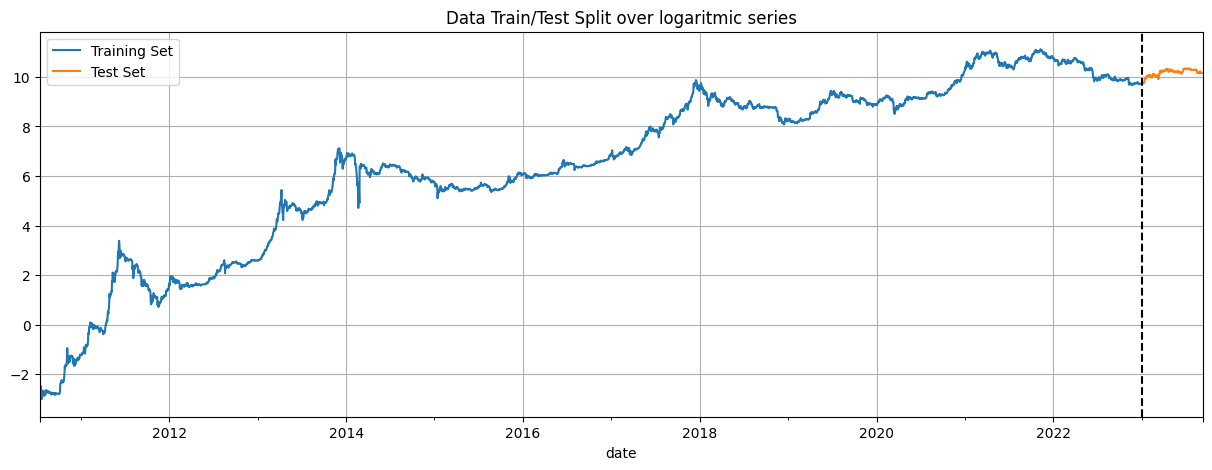

In [16]:
dfLog = df[['log']]
trainLog = dfLog.loc[dfLog.index < '2023-01-01']
testLog = dfLog.loc[dfLog.index >= '2023-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
trainLog.plot(ax=ax, label='Training Set', title='Data Train/Test Split over logaritmic series')
testLog.plot(ax=ax, label='Test Set')
ax.axvline('2023-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
ax.grid()
plt.show()

En el gráfico de autocorrelación (ver capitulo 3) pudimos apreciar un nivel de significancia hasta el lag 1 para luego decaer. Por lo tanto utilizaremos una MA de 30 dias.

*In the autocorrelation plot (see Chapter 3), we observed significance up to lag 1 before it declined. Therefore, we will use a 30-day moving average.*

In [17]:
testLog['MA30'] = testLog.rolling(window=30).mean()
testLog['MA50'] = testLog['log'].rolling(window=50).mean()
testLog['MA100'] = testLog['log'].rolling(window=100).mean()
testLog['EMA100'] = testLog['log'].ewm(span=100, adjust=False, min_periods=0).mean()

In [18]:
testLog = testLog.dropna()
MSE_30 = mean_squared_error(testLog['log'], testLog['MA30'])
MSE_50 = mean_squared_error(testLog['log'], testLog['MA50'])
MSE_100 = mean_squared_error(testLog['log'], testLog['MA100'])
MSE_EMA = mean_squared_error(testLog['log'], testLog['EMA100'])
print(f'El error cuadrático medio de la MA de 30 es: {MSE_30}')
print(f'El error cuadrático medio de la MA de 50 es: {MSE_50}')
print(f'El error cuadrático medio de la MA de 100 es: {MSE_100}')
print(f'El error cuadrático medio de la EMA de 100 es: {MSE_EMA}')

El error cuadrático medio de la MA de 30 es: 0.002925207523024632
El error cuadrático medio de la MA de 50 es: 0.005491121711001958
El error cuadrático medio de la MA de 100 es: 0.008442296173806627
El error cuadrático medio de la EMA de 100 es: 0.009314184589007759


In [19]:
# We add it to our DataFrame.
Log_row = {'Series': 'Logaritmic', 'MA50': MSE_50, 'MA100': MSE_100, 'EMA100': MSE_EMA, 'ACF_MA': MSE_30}
dfMSE = dfMSE.append(Log_row, ignore_index=True)

In [20]:
dfMSE

,Series,MA50,MA100,EMA100,ACF_MA
0,Differentiated,312687.422092,314841.318640,310961.279189,271248.842834
1,Logaritmic,0.005491,0.008442,0.009314,0.002925


In [21]:

fig = px.line(testLog, x=testLog.index, y=['MA30', 'MA50', 'MA100', 'EMA100'],
              title='Test Data of Logaritmic series with MA and EMA')
fig.add_trace(go.Scatter(x=testLog.index, y=testLog['log'], name='log', line=dict(width=3, color='black')))
fig.update_xaxes(
    tickmode="auto",
    tickangle=45,
    showgrid=True,
)
fig.show()

## Serie cúbica/ Cubic Series

In [22]:
dfCubic = df[['cubic']]
trainCub = dfCubic.loc[dfCubic.index < '2023-01-01']
testCub = dfCubic.loc[dfCubic.index >= '2023-01-01']

Las siguientes series no son estacionarias, por lo tanto, no crearemos la media móvil basada en la función de autocorrelación.

*The following series are not stationary; therefore, we will not create the moving average based on the autocorrelation function.*

In [23]:
testCub['MA50'] = testCub['cubic'].rolling(window=50).mean()
testCub['MA100'] = testCub['cubic'].rolling(window=100).mean()
testCub['EMA100'] = testCub['cubic'].ewm(span=100, adjust=False, min_periods=0).mean()

In [24]:
testCub = testCub.dropna()
MSE_50 = mean_squared_error(testCub['cubic'], testCub['MA50'])
MSE_100 = mean_squared_error(testCub['cubic'], testCub['MA100'])
MSE_EMA = mean_squared_error(testCub['cubic'], testCub['EMA100'])
print(f'El error cuadrático medio de la MA de 50 es: {MSE_50}')
print(f'El error cuadrático medio de la MA de 100 es: {MSE_100}')
print(f'El error cuadrático medio de la EMA de 100 es: {MSE_EMA}')

El error cuadrático medio de la MA de 50 es: 0.5575526459233142
El error cuadrático medio de la MA de 100 es: 0.8316581536073535
El error cuadrático medio de la EMA de 100 es: 0.8927035504879784


In [25]:
Cub_row = {'Series': 'Cubic', 'MA50': MSE_50, 'MA100': MSE_100, 'EMA100': MSE_EMA, 'ACF_MA': np.nan}
dfMSE = dfMSE.append(Cub_row, ignore_index=True)

In [26]:
fig = px.line(testCub, x=testCub.index, y=['MA50', 'MA100', 'EMA100'],
              title='Test Data of Cubic series with MA and EMA')
fig.add_trace(go.Scatter(x=testCub.index, y=testCub['cubic'], name='cubic', line=dict(width=3, color='black')))
fig.update_xaxes(
    tickmode="auto",
    tickangle=45,
    showgrid=True,
)
fig.show()

## *Yeo_Jhonson*

In [27]:
dfYeo = df[['yeo-johnson']]
trainYeo = dfYeo.loc[dfYeo.index < '2023-01-01']
testYeo = dfYeo.loc[dfYeo.index >= '2023-01-01']

In [28]:
testYeo['MA50'] = testYeo['yeo-johnson'].rolling(window=50).mean()
testYeo['MA100'] = testYeo['yeo-johnson'].rolling(window=100).mean()
testYeo['EMA100'] = testYeo['yeo-johnson'].ewm(span=100, adjust=False, min_periods=0).mean()

In [29]:
testYeo = testYeo.dropna()
MSE_50 = mean_squared_error(testYeo['yeo-johnson'], testYeo['MA50'])
MSE_100 = mean_squared_error(testYeo['yeo-johnson'], testYeo['MA100'])
MSE_EMA = mean_squared_error(testYeo['yeo-johnson'], testYeo['EMA100'])
print(f'El error cuadrático medio de la MA de 50 es: {MSE_50}')
print(f'El error cuadrático medio de la MA de 100 es: {MSE_100}')
print(f'El error cuadrático medio de la EMA de 100 es: {MSE_EMA}')

El error cuadrático medio de la MA de 50 es: 0.0013517018339265937
El error cuadrático medio de la MA de 100 es: 0.0020563408565158112
El error cuadrático medio de la EMA de 100 es: 0.002246642154565608


In [30]:
Yeo_row = {'Series': 'Yeo-johnson', 'MA50': MSE_50, 'MA100': MSE_100, 'EMA100': MSE_EMA, 'ACF_MA': np.nan}
dfMSE = dfMSE.append(Yeo_row, ignore_index=True)

In [31]:
fig = px.line(testYeo, x=testYeo.index, y=['MA50', 'MA100', 'EMA100'],
              title='Test Data of Yeo-Johnson series with MA and EMA')
fig.add_trace(go.Scatter(x=testYeo.index, y=testYeo['yeo-johnson'], name='yeo-johnson', line=dict(width=3, color='black')))
fig.update_xaxes(
    tickmode="auto",
    tickangle=45,
    showgrid=True,
)
fig.show()

## Comparación de los MSE/ *MSE comparison*

In [37]:
dfMSE

,Series,MA50,MA100,EMA100,ACF_MA
0,Differentiated,312687.422092,314841.318640,310961.279189,271248.842834
1,Logaritmic,0.005491,0.008442,0.009314,0.002925
2,Cubic,0.557553,0.831658,0.892704,NaN
3,Yeo-johnson,0.001352,0.002056,0.002247,NaN


Podemos apreciar que la serie diferenciada nos devolvió un nivel de error muy alto por lo tanto solo compararemos las series restantes:

*We can see that the differenced series returned a very high error level, so we will only compare the remaining series:*

In [39]:
dfMSE.drop(index=0, inplace=True)

In [41]:
dfMSE = dfMSE.set_index('Series')

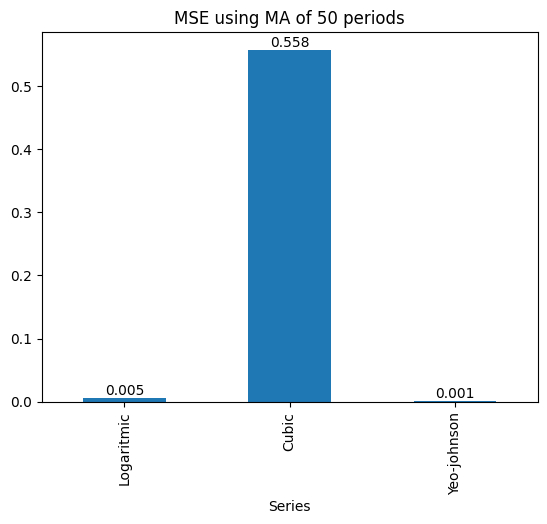

In [47]:
dfMSE['MA50'].plot(kind='bar')
for i, freq in enumerate(dfMSE['MA50']):
    plt.text(i, freq, f'{freq:.3f}', ha='center', va='bottom')
plt.title("MSE using MA of 50 periods")
plt.show()

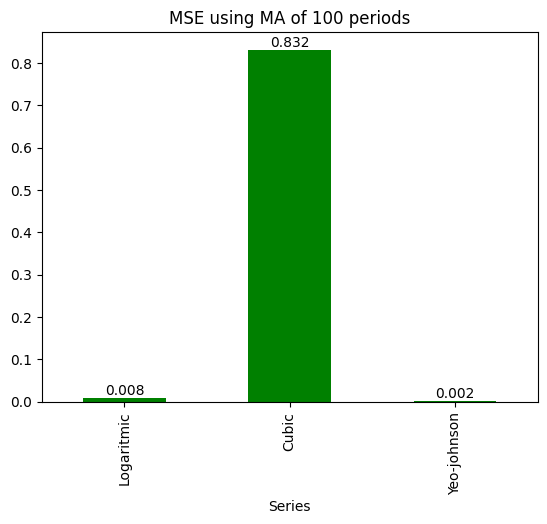

In [49]:
dfMSE['MA100'].plot(kind='bar',  color='green')
for i, freq in enumerate(dfMSE['MA100']):
    plt.text(i, freq, f'{freq:.3f}', ha='center', va='bottom')
plt.title("MSE using MA of 100 periods")
plt.show()

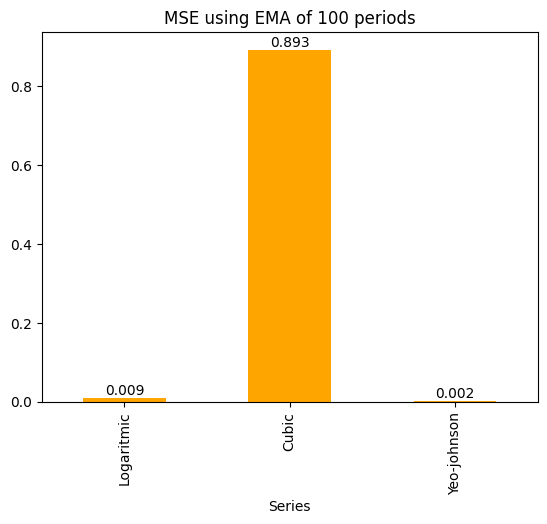

In [50]:
dfMSE['EMA100'].plot(kind='bar',  color='orange')
for i, freq in enumerate(dfMSE['EMA100']):
    plt.text(i, freq, f'{freq:.3f}', ha='center', va='bottom')
plt.title("MSE using EMA of 100 periods")
plt.show()

## Conclusión/ Conclusion

Realizamos un modelo base con medias móviles y lo aplicamos a 4 transformaciones de la serie original. Sin duda, la serie Yeo-Jhonson es aquella que obtuve el nivel de error más bajo y por eso, la tomaremos como medida para evaluar nuestros siguientes modelos. No debe despreciarse la fortaleza de estas medias móviles en la predicción de series temporales tan complejas como las que tratamos aquí. Los modelos por venir tendrán una dura tarea a la hora de mejorar las métricas aquí obtenidas.

*We created a baseline model using moving averages and applied it to four transformations of the original series. Undoubtedly, the Yeo-Johnson transformed series yielded the lowest error level, so we will use it as a benchmark to evaluate our upcoming models. The strength of these moving averages in forecasting such complex time series should not be underestimated. The models to come will have a tough task in improving the metrics obtained here.*